In [1]:
# Importing Libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('F:/dataset/bank-full.csv')


In [3]:
dataset.shape

(45211, 17)

In [4]:
new_dataset = dataset.drop(['contact','day', 'month', 'duration', 'campaign','pdays', 'previous'], axis = 1)

In [5]:
x = dataset.iloc[:, 0:8].values

y = dataset.iloc[:, 9].values

In [6]:
x.shape

(45211, 8)

In [7]:
enc_onehot = OneHotEncoder()

x=enc_onehot.fit_transform(new_dataset[['job','marital', 'education','default', 'housing', 'loan', 'poutcome']]).toarray()


In [8]:
enc_label = LabelEncoder()

y = enc_label.fit_transform(new_dataset['y'])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_s=sc.fit_transform(x_train)
x_test_s=sc.transform(x_test)

In [11]:
import tensorflow as tf
import keras
#creating model with keras
 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [17]:
classifier = Sequential()
#adding input & hiddenlayer
classifier.add(Dense(5,activation='relu',input_shape=(29,)))


In [18]:
#output layer

classifier.add(Dense(2,  activation = 'softmax'))

In [19]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',  metrics = ['accuracy'])

In [20]:
result = classifier.fit(x_train, y_train,  validation_split=0.2, batch_size = 10, epochs = 10)

Train on 28934 samples, validate on 7234 samples
Epoch 1/10
28934/28934 [==============================] - 5s 170us/step - loss: 0.3292 - accuracy: 0.8887 - val_loss: 0.3219 - val_accuracy: 0.8923
Epoch 2/10
28934/28934 [==============================] - 4s 151us/step - loss: 0.3177 - accuracy: 0.8936 - val_loss: 0.3221 - val_accuracy: 0.8925
Epoch 3/10
28934/28934 [==============================] - 4s 149us/step - loss: 0.3176 - accuracy: 0.8936 - val_loss: 0.3209 - val_accuracy: 0.8920
Epoch 4/10
28934/28934 [==============================] - 5s 170us/step - loss: 0.3174 - accuracy: 0.8938 - val_loss: 0.3197 - val_accuracy: 0.8919
Epoch 5/10
28934/28934 [==============================] - 4s 153us/step - loss: 0.3172 - accuracy: 0.8940 - val_loss: 0.3202 - val_accuracy: 0.8922
Epoch 6/10
28934/28934 [==============================] - 5s 168us/step - loss: 0.3167 - accuracy: 0.8938 - val_loss: 0.3210 - val_accuracy: 0.8923
Epoch 7/10
28934/28934 [==============================] - 5s 16

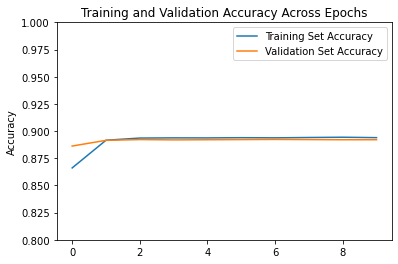

In [16]:
accuracy = result.history['accuracy'] 
validation_accuracy = result.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim([0.80,0.895])),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

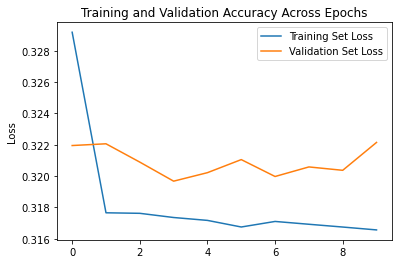

In [21]:
loss = result.history['loss']
validation_loss = result.history['val_loss'] 
plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(x_test_s) 
y_pred = y_pred.argmax(axis=1)

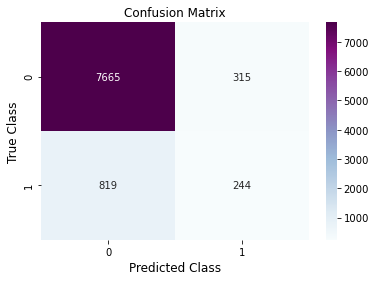

In [23]:
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='BuPu',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7980
           1       0.44      0.23      0.30      1063

    accuracy                           0.87      9043
   macro avg       0.67      0.60      0.62      9043
weighted avg       0.85      0.87      0.86      9043



In [25]:
conda install -c conda-forge imbalanced-learn 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3\envs\tf

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       h5b45459_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         290 KB

The following packages will be UPDATED:

  ca-certificates                      2022.9.24-h5b45459_0 --> 2022.12.7-h5b45459_0 None
  certifi                            2022.9.24-pyhd8ed1ab_0 --> 2022.12.7-pyhd8ed1ab_0 None




certifi-2022.12.7    | 147 KB    |            |   0% 
certifi-2022.12.7    | 147 KB    | #          |  11% 
certifi-2022.12.7    | 147 KB    | ########## | 100% 
Note: you ma



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda





ca-certificates-2022 | 143 KB    |            |   0% 
ca-certificates-2022 | 143 KB    | ########## | 100% 
ca-certificates-2022 | 143 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done


In [26]:
import imblearn



In [27]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE(random_state = 0)
x_train_smote, y_train_smote = resampler.fit_resample(x_train, y_train)

In [33]:
classifier = Sequential()
#adding input & hiddenlayer

classifier.add(Dense(4,activation='relu',input_shape=(29,)))

In [34]:
#output layer

classifier.add(Dense(2,  activation = 'softmax'))

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sm=sc.fit_transform(x_train_smote)
x_test_sm=sc.transform(x_test)

In [36]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',  metrics = ['accuracy'])

In [37]:
result = classifier.fit(x_train_sm, y_train_smote,  validation_split=0.2, batch_size = 10, epochs = 10)

Train on 51107 samples, validate on 12777 samples
Epoch 1/10
51107/51107 [==============================] - 8s 161us/step - loss: 0.5973 - accuracy: 0.6913 - val_loss: 0.8694 - val_accuracy: 0.3412
Epoch 2/10
51107/51107 [==============================] - 8s 164us/step - loss: 0.5759 - accuracy: 0.7085 - val_loss: 0.8165 - val_accuracy: 0.4507
Epoch 3/10
51107/51107 [==============================] - 8s 156us/step - loss: 0.5753 - accuracy: 0.7092 - val_loss: 0.8512 - val_accuracy: 0.4006
Epoch 4/10
51107/51107 [==============================] - 8s 164us/step - loss: 0.5750 - accuracy: 0.7089 - val_loss: 0.8738 - val_accuracy: 0.3597
Epoch 5/10
51107/51107 [==============================] - 8s 149us/step - loss: 0.5746 - accuracy: 0.7095 - val_loss: 0.8123 - val_accuracy: 0.4309
Epoch 6/10
51107/51107 [==============================] - 8s 163us/step - loss: 0.5746 - accuracy: 0.7083 - val_loss: 0.8717 - val_accuracy: 0.3561
Epoch 7/10
51107/51107 [==============================] - 8s 1

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(x_test_sm) 
y_pred = y_pred.argmax(axis=1)

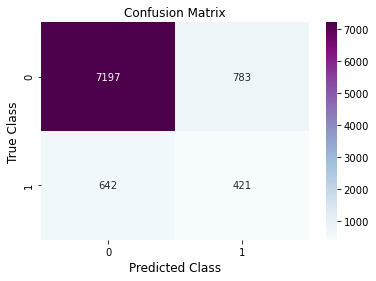

In [39]:
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='BuPu',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7980
           1       0.35      0.40      0.37      1063

    accuracy                           0.84      9043
   macro avg       0.63      0.65      0.64      9043
weighted avg       0.85      0.84      0.85      9043

